## Notebook settings

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

## Imports

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import uproot
import logging
import tpvalidator.workspace as ws
import tpvalidator.utilities as utils
import tpvalidator.analyzers.snn as snn

from rich import print
from tpvalidator.utilities import temporary_log_level, subplot_autogrid
from tpvalidator.histograms import uproot_hist_mean_std


# Load ADC mean and standard deviation from wafevorm histograms

In [3]:
pool=None
with temporary_log_level(ws.TriggerPrimitivesWorkspace._log, logging.INFO):
    tpws = ws.TriggerPrimitivesWorkspace("../data/vd/ar39/100events/tptree_st_tpg_vd_ar39.root")

print(tpws.info)

<TTree 'ides_tree' (13 branches) at 0x0001130ab890>


{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'mc_generator_labels': ['Ar39GenInLAr'],
    'tpg': {
        'threshold_tpg_plane0': 23,
        'threshold_tpg_plane1': 23,
        'threshold_tpg_plane2': 26,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

In [4]:
tpws.add_rawdigits('../data/vd/ar39/100events/trigger_digits_waves_detsim_vd_ar39.root')

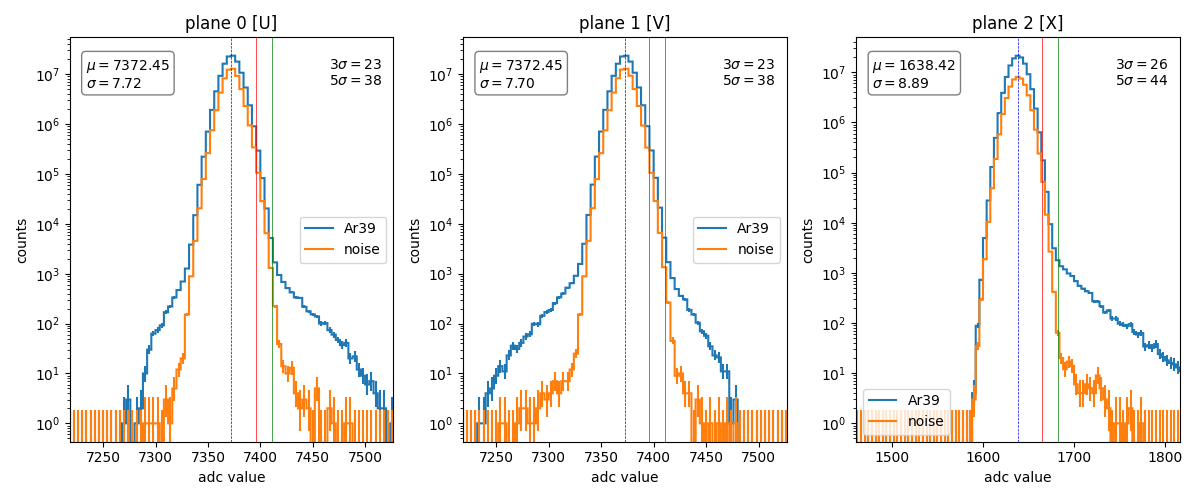

In [5]:
fig = snn.draw_signal_and_noise_adc_distros(tpws)
fig.tight_layout()

# TP sample validation
## Distribution of point of origin in the detector

In [6]:
all_tps = snn.TPSignalNoisePreSelection(tpws.tps)
alltp_ana = snn.TPSignalNoiseAnalyzer(all_tps)

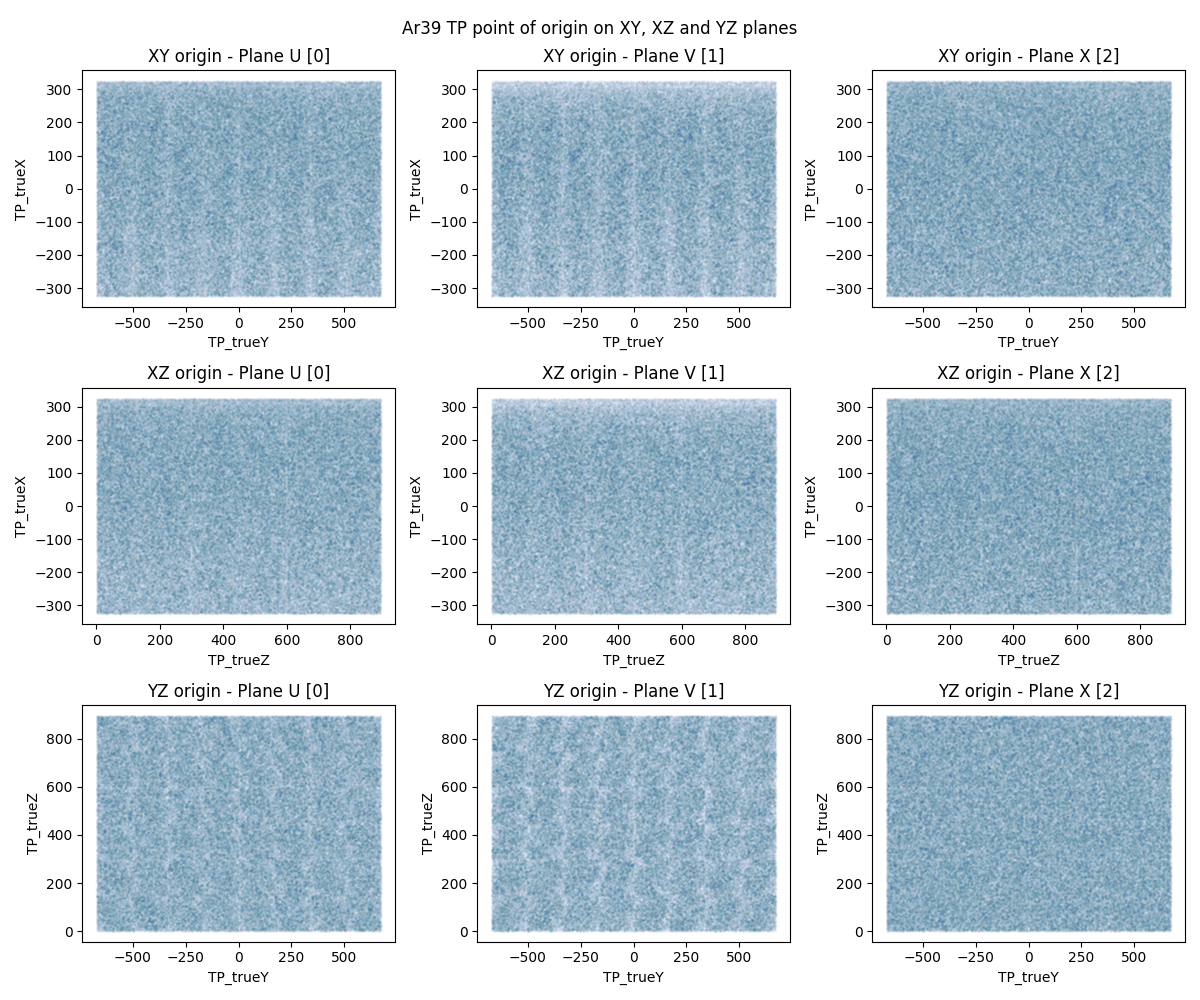

In [7]:
fig = alltp_ana.draw_tp_origin_2d_dist()
fig.tight_layout()

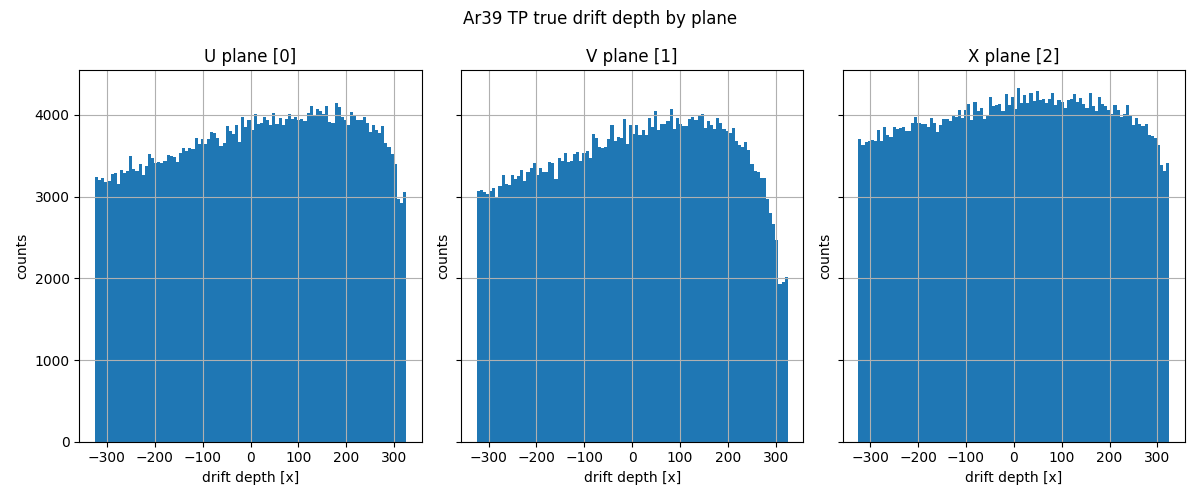

In [8]:
fig = alltp_ana.draw_tp_drift_depth_dist()
fig.tight_layout()

# Dataset validation: TP distribution in time

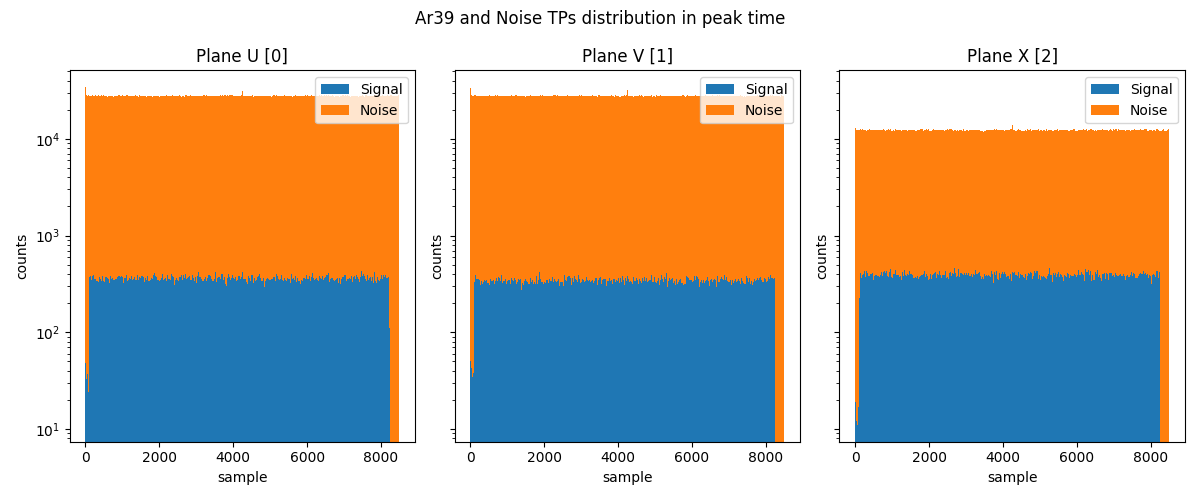

In [64]:
fig = alltp_ana.draw_tp_start_time_dist()
fig.tight_layout()

# Cleaning: removing regions with non-even backtracking efficiency

In [10]:
clean_tps = snn.TPSignalNoisePreSelection(tpws.tps[(tpws.tps.TP_startT >100) & (tpws.tps.TP_startT <8100)])
tp_ana = snn.TPSignalNoiseAnalyzer(clean_tps)

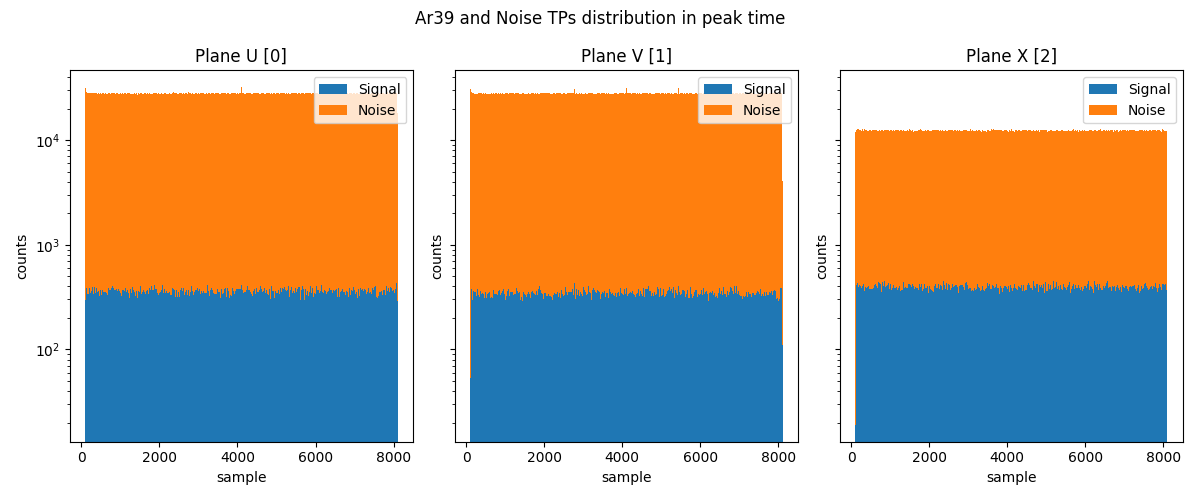

In [11]:
fig = tp_ana.draw_tp_time_dist()
fig.tight_layout()

# PeakADC, time-over-threshold and SumADC distribution for Ar39 and noise

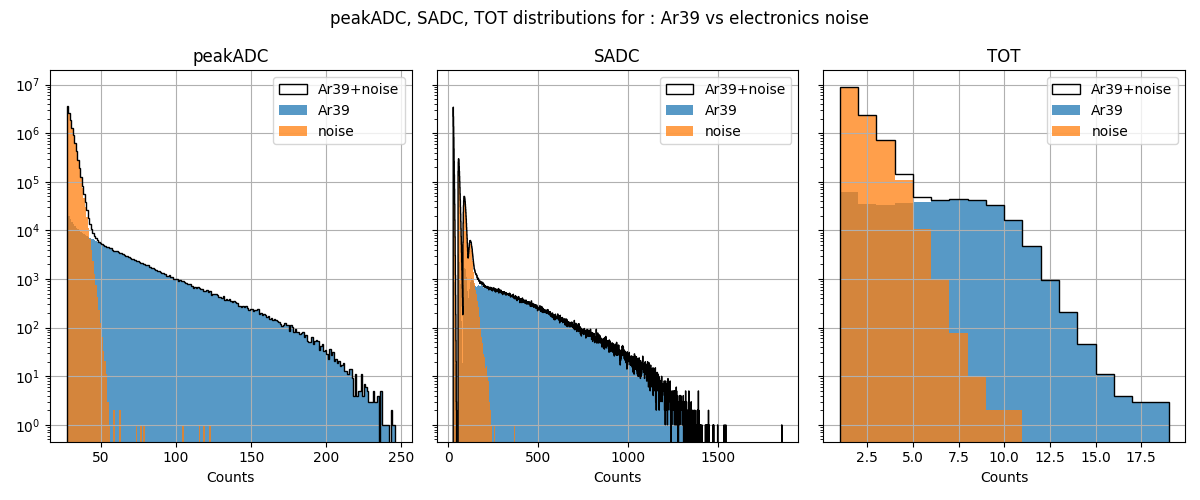

In [12]:
fig = tp_ana.draw_tp_signal_noise_dist()
fig.tight_layout()

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/analyzers/snn.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tps.sig_p2.groupby(pd.cut(tps.sig_p2.TP_trueX, n_x_bins))


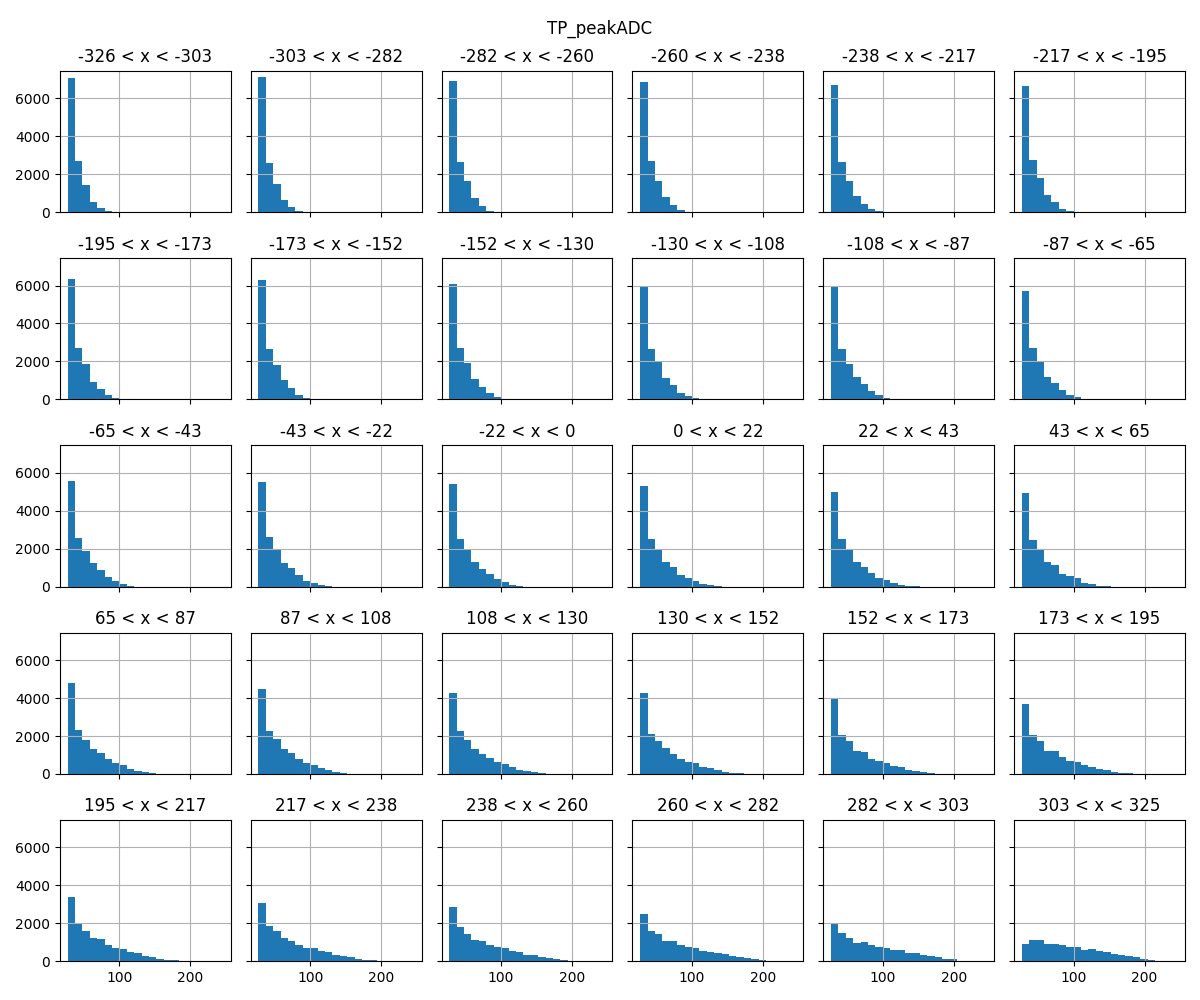

In [13]:
fig = tp_ana.draw_variable_in_drift_grid('peakADC', downsampling=10, sharex=True, sharey=True, figsize=(12,10))
fig.tight_layout()

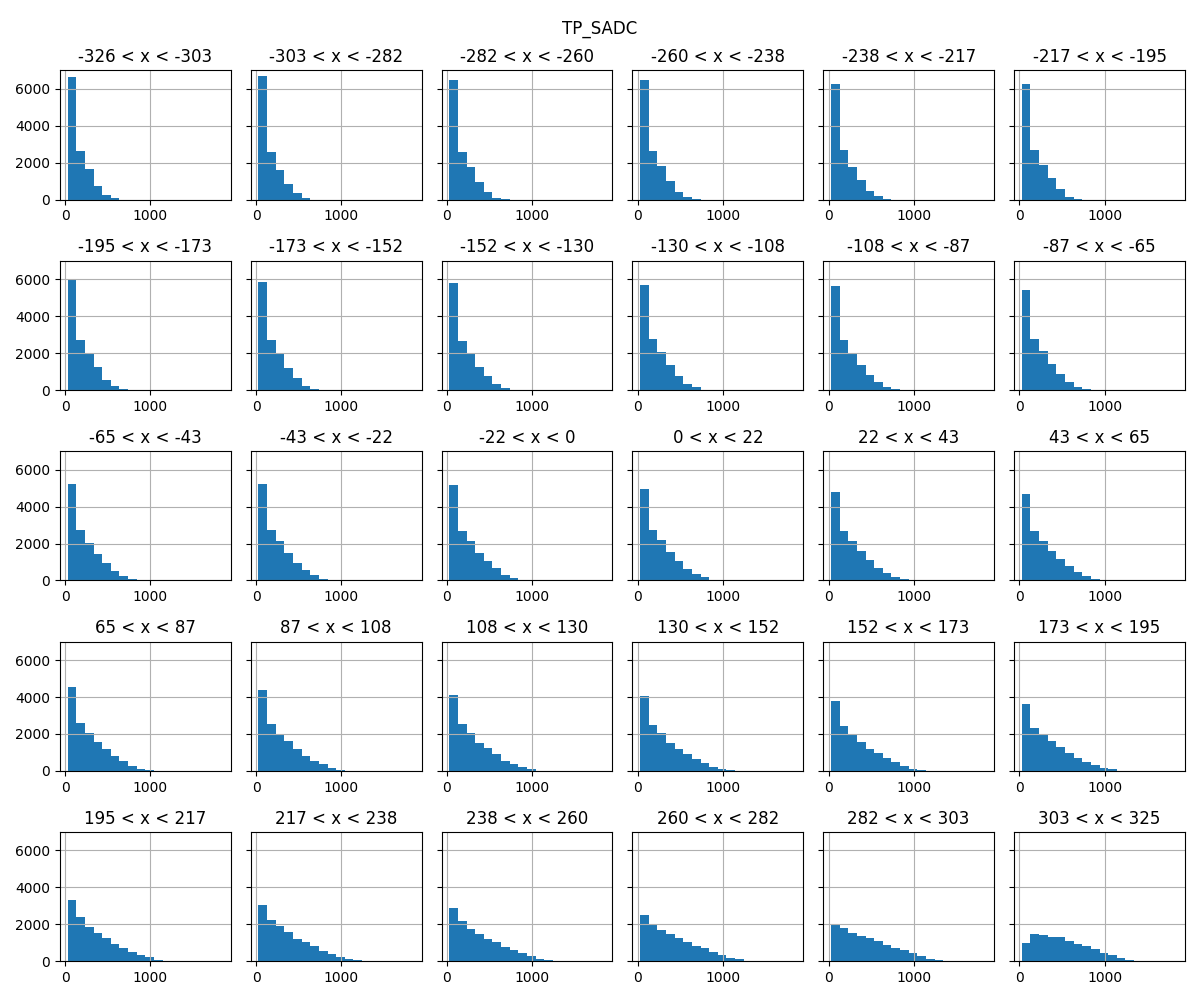

In [14]:
fig = tp_ana.draw_variable_in_drift_grid('SADC', downsampling=100, sharey=True, figsize=(12,10))
fig.tight_layout()

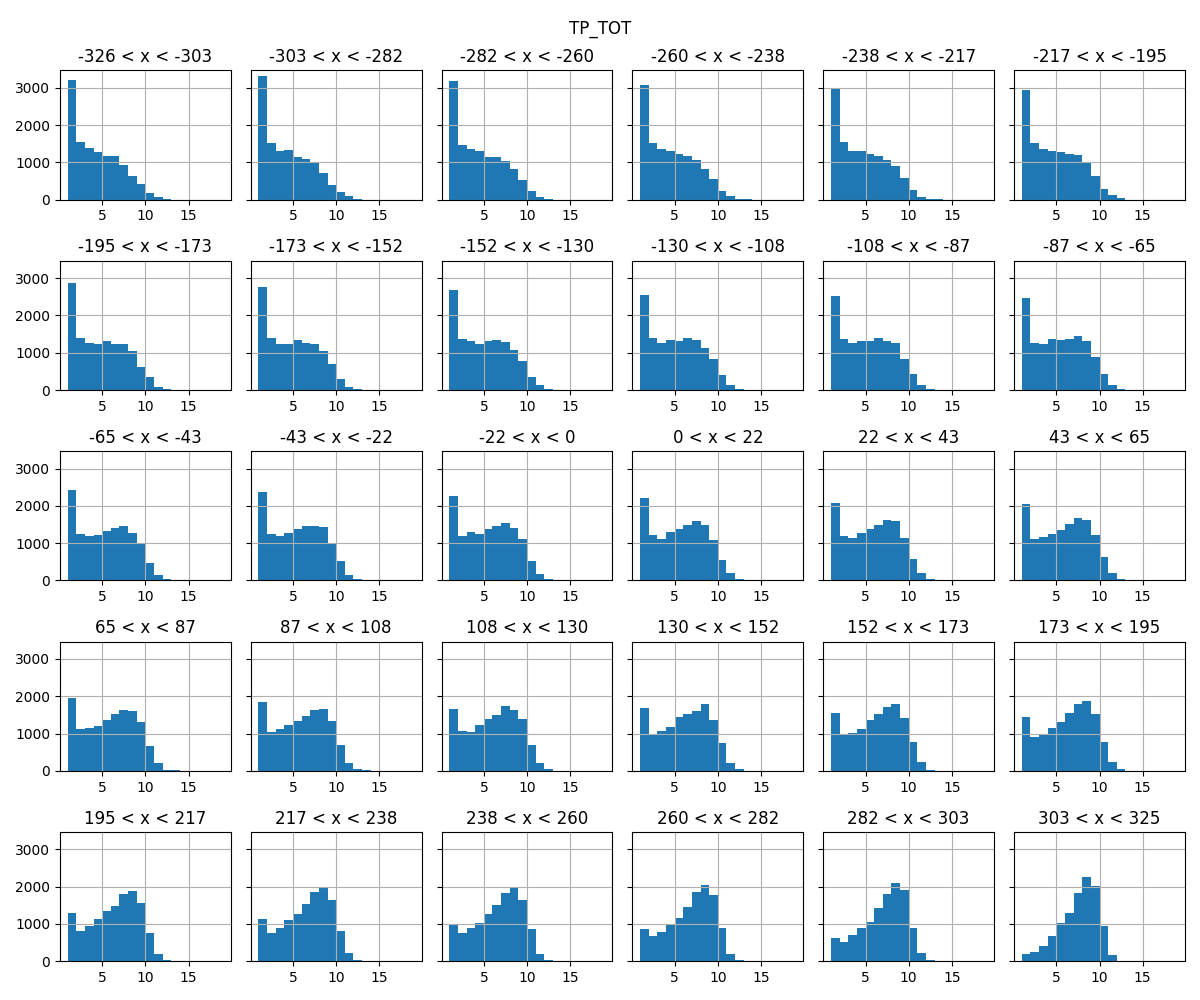

In [15]:
fig = tp_ana.draw_variable_in_drift_grid('TOT', downsampling=1, log=False, sharey=True, figsize=(12,10))
fig.tight_layout()

/Users/ale/Development/dune/trigger-studies/tpvalidator/src/tpvalidator/analyzers/snn.py:354: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tps.sig_p2.groupby(pd.cut(tps.sig_p2.TP_trueX, n_x_bins))


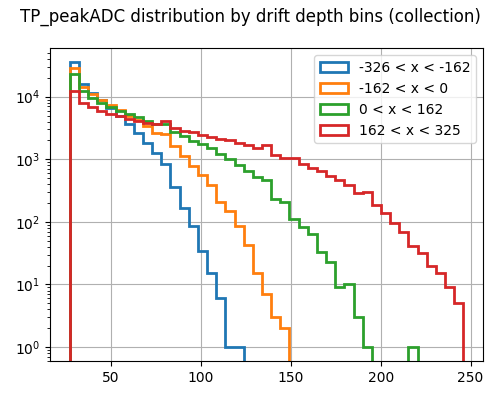

In [16]:
fig = tp_ana.draw_variable_drift_stack('peakADC', downsampling=5, n_x_bins=4, log=True, figsize=(5,4))
fig.tight_layout()

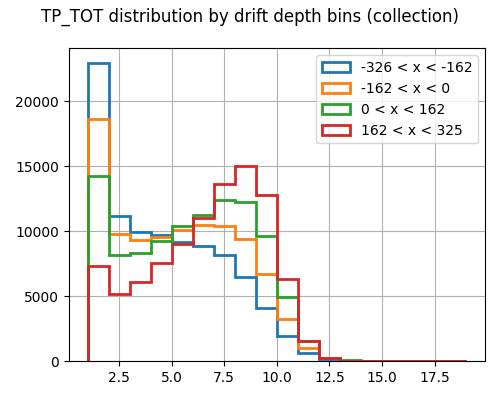

In [17]:
fig = tp_ana.draw_variable_drift_stack('TOT', downsampling=1, n_x_bins=4, log=False, figsize=(5,4))
fig.tight_layout()


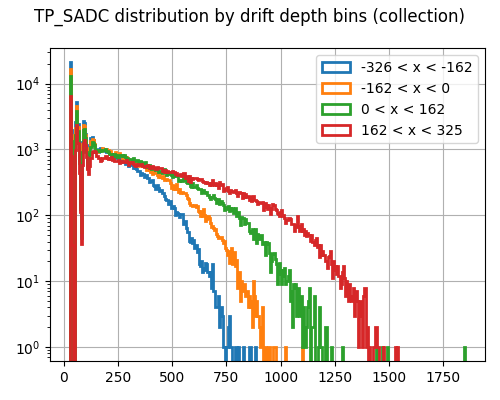

In [18]:
fig = tp_ana.draw_variable_drift_stack('SADC', downsampling=5, n_x_bins=4, log=True, figsize=(5,4))
fig.tight_layout()


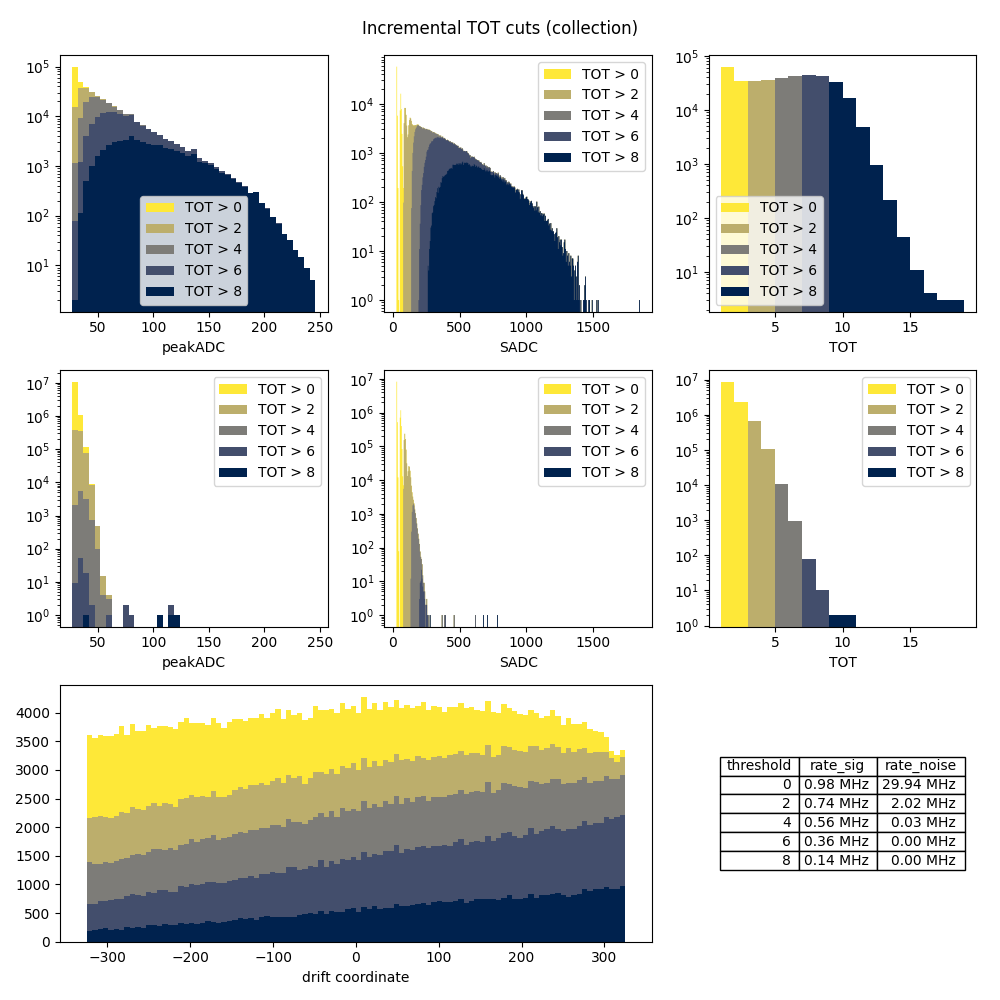

In [26]:
tot_cuts = [t for t in range(0,10,2)]

fig = tp_ana.draw_variable_cut_sequence('TOT', tot_cuts, log=True, figsize=(10,10))
fig.tight_layout()



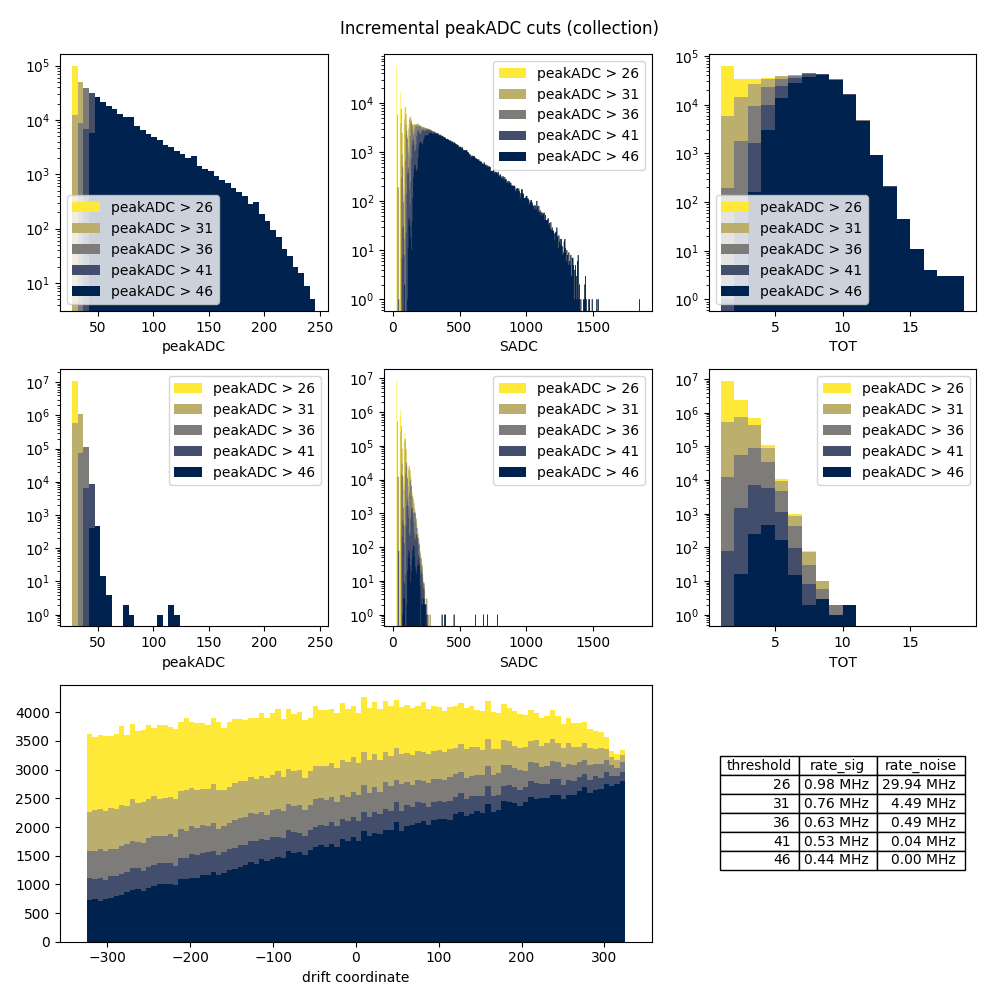

In [29]:
cuts = [t for t in range(26, 50, 5)]

fig = tp_ana.draw_variable_cut_sequence('peakADC', cuts, log=True, figsize=(10,10))
fig.tight_layout()

<string>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


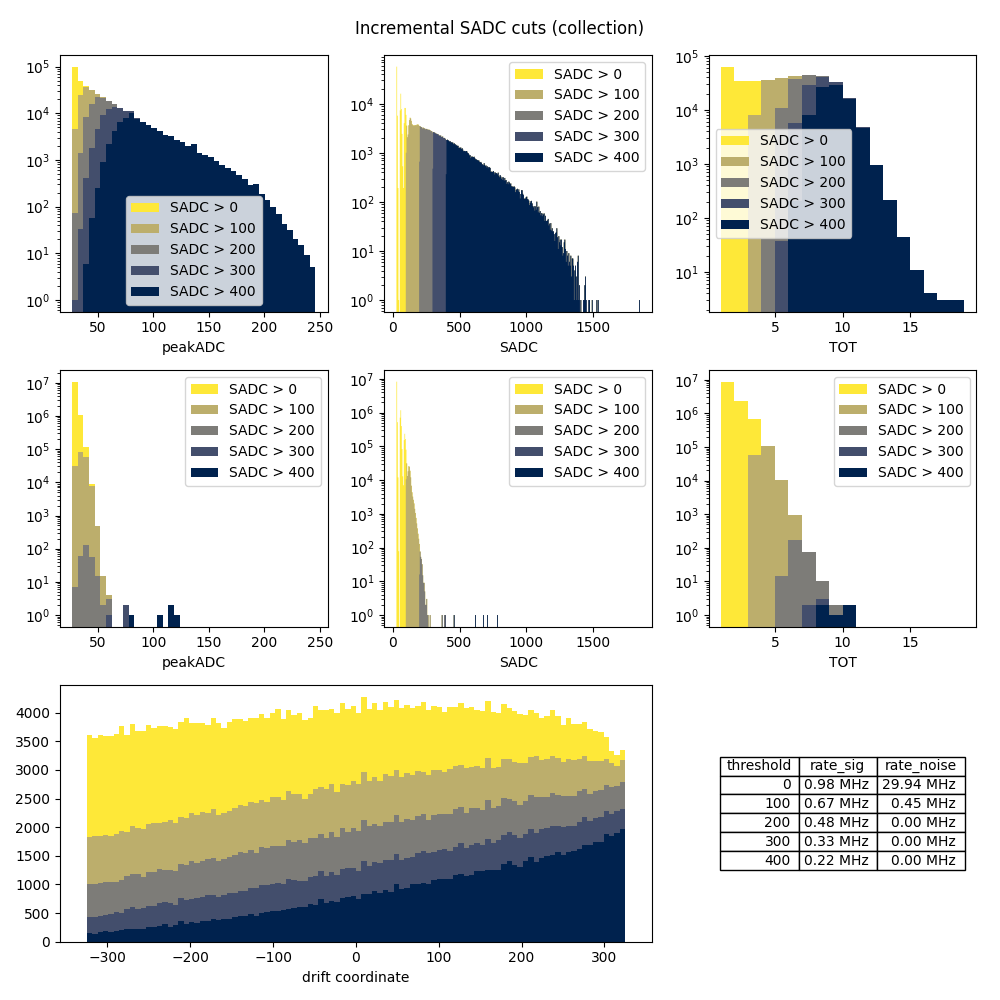

In [28]:
cuts = [t for t in range(0, 500, 100)]

fig = tp_ana.draw_variable_cut_sequence('SADC', cuts, figsize=(10,10), log=True)
fig.tight_layout()

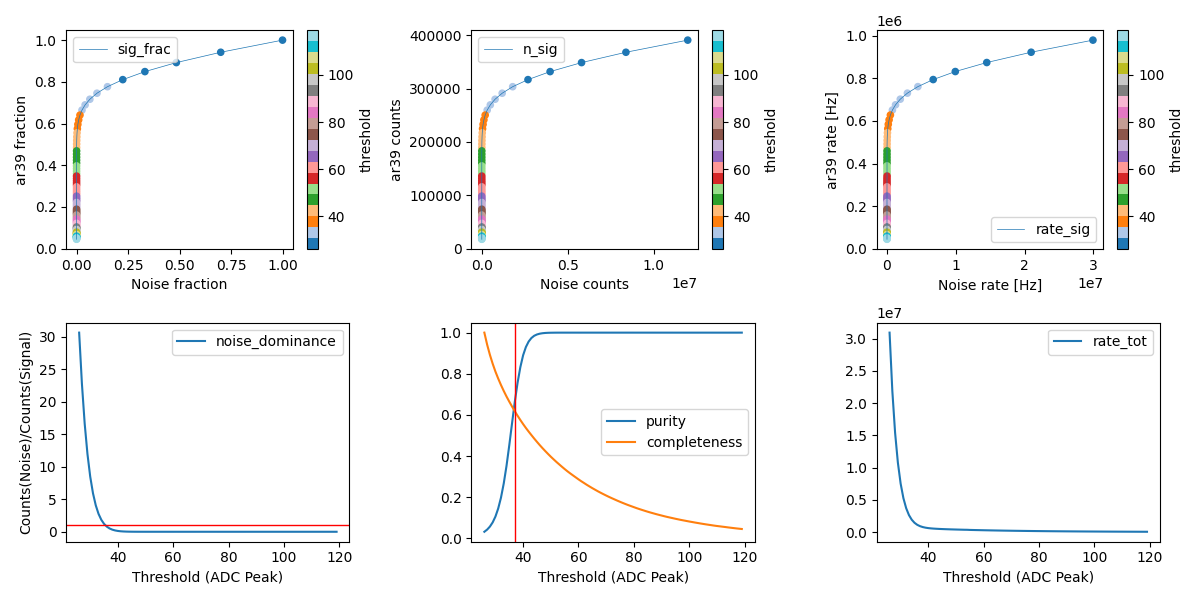

In [22]:
thresholds = [t for t in range(26, 120, 1)]

fig = tp_ana.draw_threshold_scan('peakADC', thresholds)
fig.tight_layout()

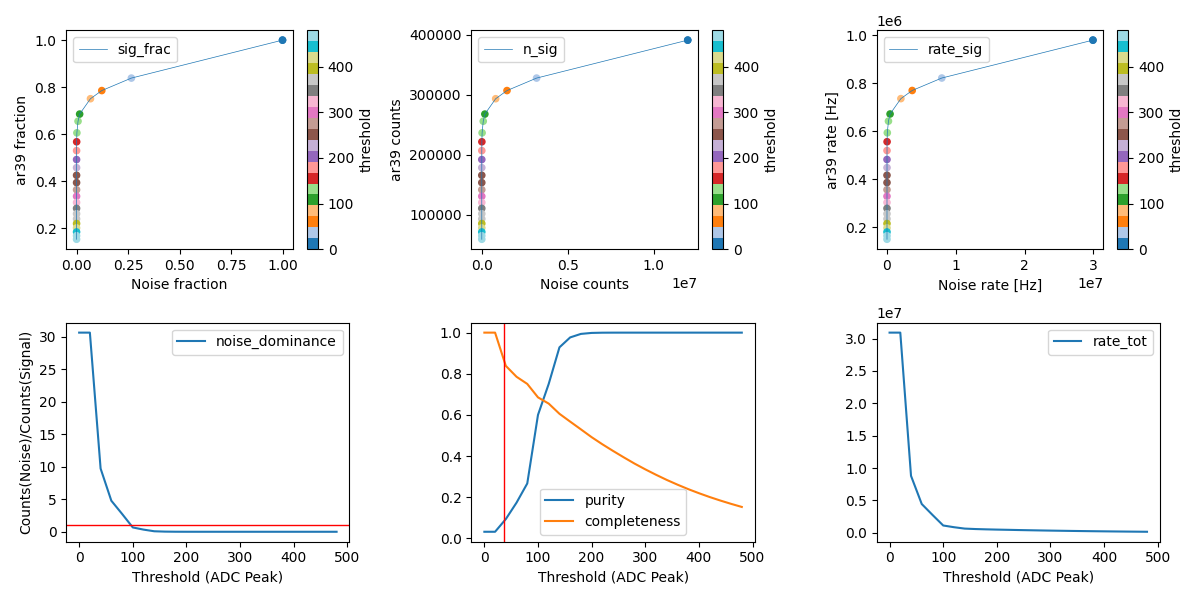

In [23]:
thresholds = [t for t in range(0, 500, 20)]

fig = tp_ana.draw_threshold_scan('SADC', thresholds)
fig.tight_layout()

# Investigating weird TP and IDES distributions

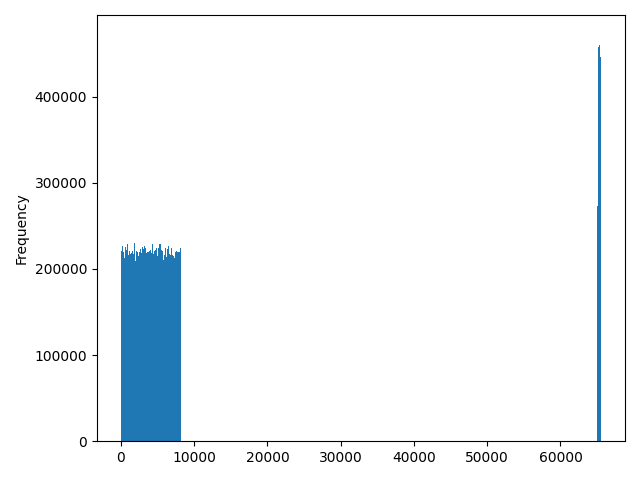

In [ ]:
fig, ax = plt.subplots()
tpws.ides.time.plot.hist(bins=1000)
fig.tight_layout()

In [86]:
weird_ides = tpws.ides[tpws.ides.time > 8500]
display(weird_ides)
first_ides = tpws.ides[tpws.ides.time < 100]
display(first_ides)


event       run  subrun  n_ides  channel   time  track_id  \
entry subentry                                                              
0     466           1  20000047       0  308962      108  65350     13338   
      467           1  20000047       0  308962      108  65350     13338   
      468           1  20000047       0  308962      108  65351     13338   
      469           1  20000047       0  308962      108  65351     13338   
      470           1  20000047       0  308962      108  65352     13338   
...               ...       ...     ...     ...      ...    ...       ...   
99    309225      100  20000047       0  309595    41427  65246      6875   
      309226      100  20000047       0  309595    41427  65247      6875   
      309227      100  20000047       0  309595    41427  65248      6875   
      309228      100  20000047       0  309595    41427  65249      6875   
      309229      100  20000047       0  309595    41427  65250      6875   

                mcgen_key  n_electrons    energy           x           y  \
entry subentry                                                             
0     466               0   247.365677  0.012571  276.644745 -659.078369   
      467               0   119.060219  0.010584  276.652069 -659.084656   
      468               0  2060.005859  0.104692  276.644745 -659.078369   
      469               0   731.576538  0.065032  276.652069 -659.084656   
      470               0   726.811401  0.036937  276.644745 -659.078369   
...                   ...          ...       ...         ...         ...   
99    309225            0    52.605354  0.003962   96.971237  593.558716   
      309226            0    51.393204  0.003870   96.971237  593.558716   
      309227            0    27.895889  0.002101   96.971237  593.558716   
      309228            0     8.403118  0.000633   96.971237  593.558716   
      309229            0     1.401907  0.000106   96.971237  593.558716   

                         z  
entry subentry              
0     466       143.752151  
      467       143.750198  
      468       143.752151  
      469       143.750198  
      470       143.752151  
...                    ...  
99    309225    872.858215  
      309226    872.858215  
      309227    872.858215  
      309228    872.858215  
      309229    872.858215  

[3461739 rows x 13 columns]

event       run  subrun  n_ides  channel  time  track_id  \
entry subentry                                                             
0     605           1  20000047       0  308962      131     3     14739   
      606           1  20000047       0  308962      131     4     14739   
      607           1  20000047       0  308962      131     5     14739   
      608           1  20000047       0  308962      131     6     14739   
      609           1  20000047       0  308962      131     7     14739   
...               ...       ...     ...     ...      ...   ...       ...   
99    309187      100  20000047       0  309595    41420     3      8649   
      309196      100  20000047       0  309595    41421     0      8649   
      309197      100  20000047       0  309595    41421     1      8649   
      309198      100  20000047       0  309595    41421     2      8649   
      309199      100  20000047       0  309595    41421     3      8649   

                mcgen_key  n_electrons    energy          x           y  \
entry subentry                                                            
0     605               0     1.620536  0.000209   3.332465 -639.864807   
      606               0     7.838993  0.001009   3.332465 -639.864807   
      607               0    25.072035  0.003228   3.332465 -639.864807   
      608               0    53.056206  0.006830   3.332465 -639.864807   
      609               0    74.318878  0.009567   3.332465 -639.864807   
...                   ...          ...       ...        ...         ...   
99    309187            0    11.216750  0.000727  56.360992  659.764404   
      309196            0  1129.979492  0.072480  56.361008  659.764221   
      309197            0   252.726990  0.016226  56.361004  659.764221   
      309198            0    76.460922  0.004912  56.361004  659.764221   
      309199            0    14.054015  0.000903  56.361004  659.764221   

                         z  
entry subentry              
0     605       145.933273  
      606       145.933273  
      607       145.933273  
      608       145.933273  
      609       145.933273  
...                    ...  
99    309187    870.033447  
      309196    870.033569  
      309197    870.033569  
      309198    870.033569  
      309199    870.033569  

[344887 rows x 13 columns]

344887

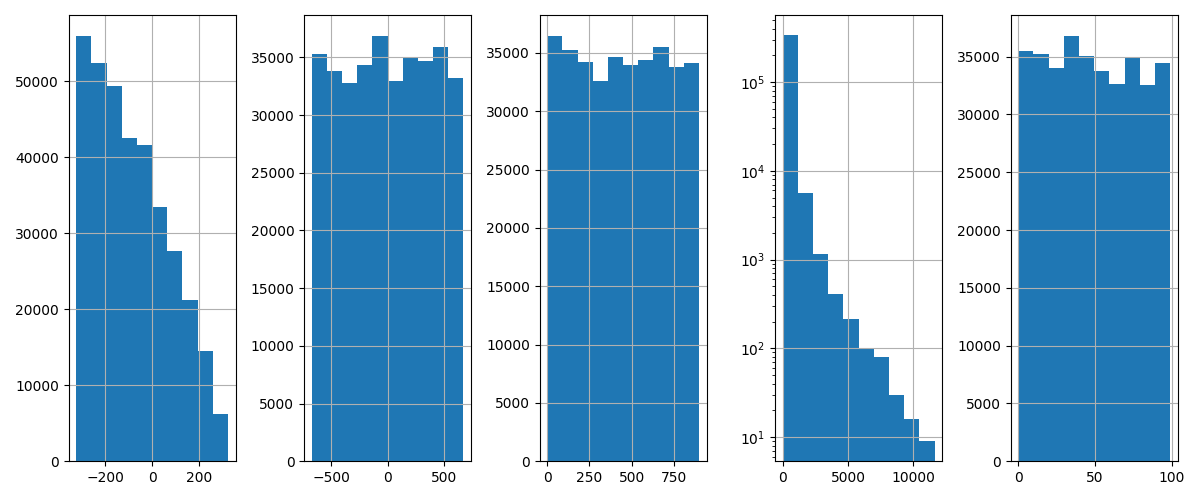

In [96]:
fig, ax = plt.subplots(1,5, figsize=(12,5))

df = first_ides
print(len(df))
df.x.hist(ax=ax[0])
df.y.hist(ax=ax[1])
df.z.hist(ax=ax[2])
df.n_electrons.hist(ax=ax[3], log=True)
df.time.hist(ax=ax[4])
fig.tight_layout()

3461739

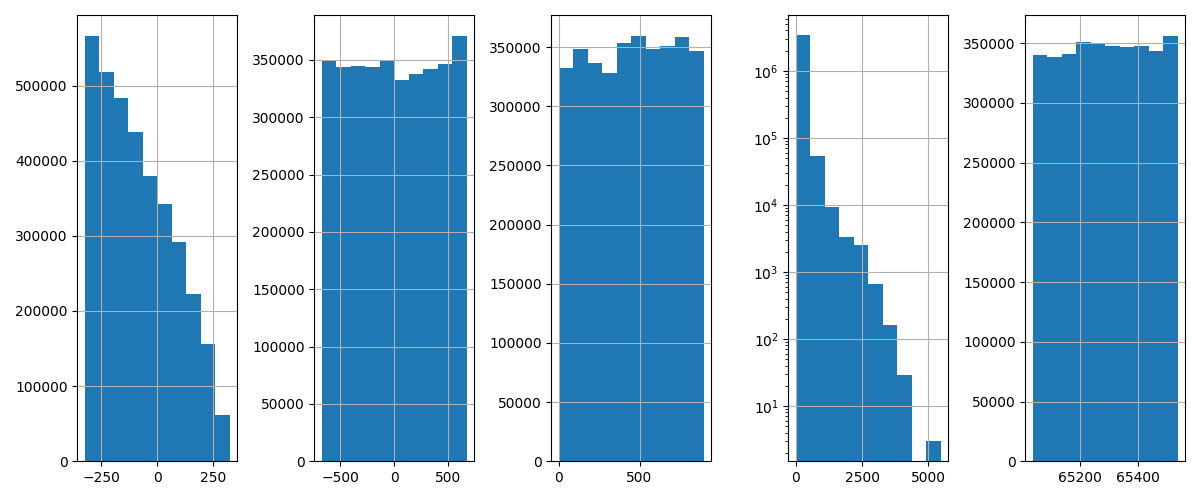

In [95]:
fig, ax = plt.subplots(1,5, figsize=(12,5))

df = weird_ides
print(len(df))
df.x.hist(ax=ax[0])
df.y.hist(ax=ax[1])
df.z.hist(ax=ax[2])
df.n_electrons.hist(ax=ax[3], log=True)
df.time.hist(ax=ax[4])
fig.tight_layout()


209

5150

5451

5356

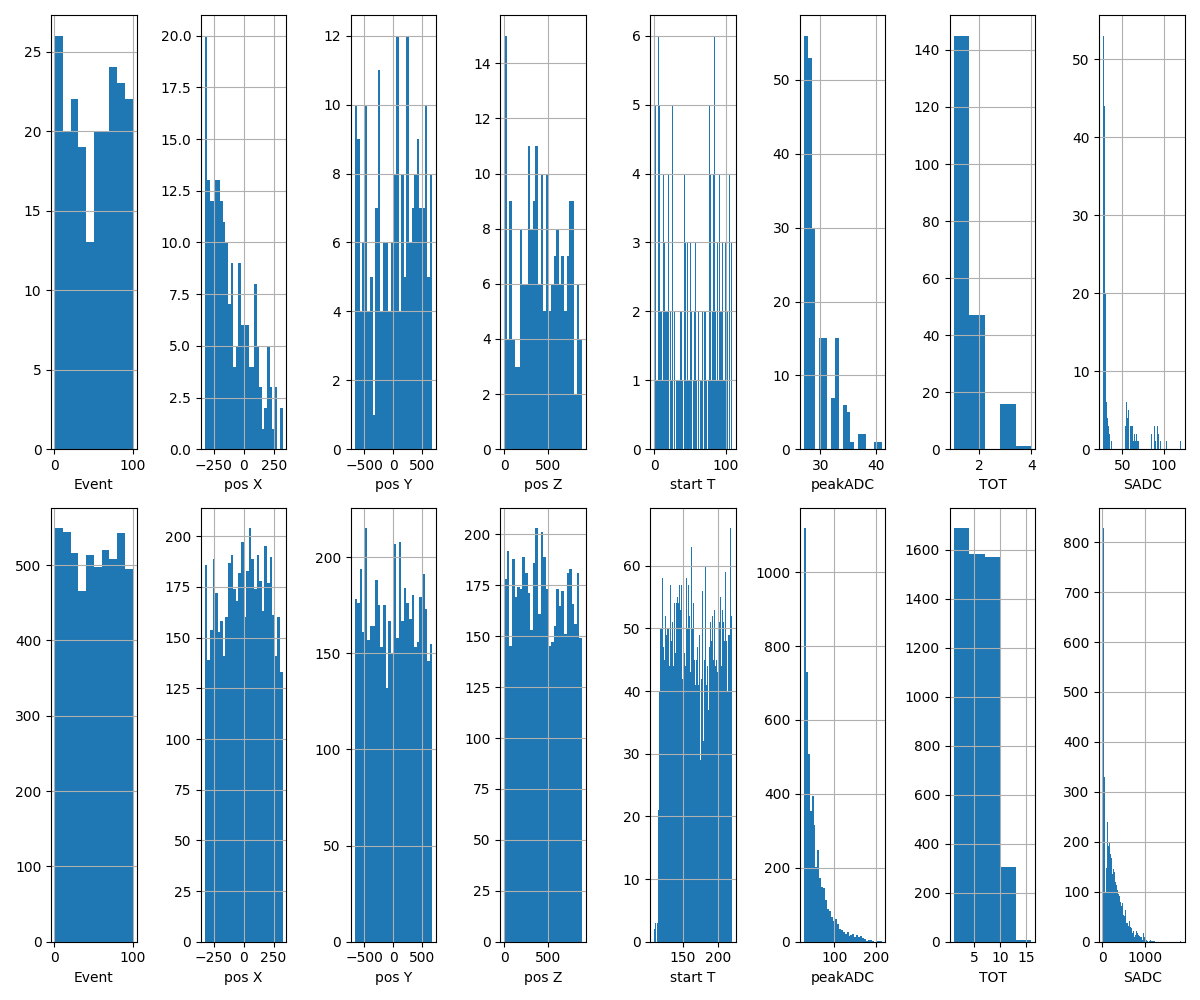

In [107]:
fig, axes = plt.subplots(2,8, figsize=(12,10))


dodgy_sig_p2 = all_tps.sig_p2[(all_tps.sig_p2.TP_startT < 110)]
ref_a_sig_p2 = all_tps.sig_p2[(all_tps.sig_p2.TP_startT >= 110) & (all_tps.sig_p2.TP_startT < 220)]
ref_b_sig_p2 = all_tps.sig_p2[(all_tps.sig_p2.TP_startT >= 220) & (all_tps.sig_p2.TP_startT < 330)]
ref_c_sig_p2 = all_tps.sig_p2[(all_tps.sig_p2.TP_startT >= 330) & (all_tps.sig_p2.TP_startT < 440)]

print(len(dodgy_sig_p2))
print(len(ref_a_sig_p2))
print(len(ref_b_sig_p2))
print(len(ref_c_sig_p2))


df = dodgy_sig_p2
ax=axes[0][0]
df.event.hist(ax=ax)
ax.set_xlabel('Event')
ax=axes[0][1]
df.TP_trueX.hist(ax=ax, bins=30)
ax.set_xlabel('pos X')
ax=axes[0][2]
df.TP_trueY.hist(ax=ax, bins=30)
ax.set_xlabel('pos Y')
ax=axes[0][3]
df.TP_trueZ.hist(ax=ax, bins=30)
ax.set_xlabel('pos Z')
ax=axes[0][4]
df.TP_startT.hist(ax=ax, bins=110)
ax.set_xlabel('start T')
ax=axes[0][5]
df.TP_peakADC.hist(ax=ax, bins=20)
ax.set_xlabel('peakADC')
ax=axes[0][6]
df.TP_TOT.hist(ax=ax, bins=5)
ax.set_xlabel('TOT')
ax=axes[0][7]
df.TP_SADC.hist(ax=ax, bins=100)
ax.set_xlabel('SADC')

df = ref_a_sig_p2
ax=axes[1][0]
df.event.hist(ax=ax)
ax.set_xlabel('Event')
ax=axes[1][1]
df.TP_trueX.hist(ax=ax, bins=30)
ax.set_xlabel('pos X')
ax=axes[1][2]
df.TP_trueY.hist(ax=ax, bins=30)
ax.set_xlabel('pos Y')
ax=axes[1][3]
df.TP_trueZ.hist(ax=ax, bins=30)
ax.set_xlabel('pos Z')
ax=axes[1][4]
df.TP_startT.hist(ax=ax, bins=110)
ax.set_xlabel('start T')
ax=axes[1][5]
df.TP_peakADC.hist(ax=ax, bins=40)
ax.set_xlabel('peakADC')
ax=axes[1][6]
df.TP_TOT.hist(ax=ax, bins=5)
ax.set_xlabel('TOT')
ax=axes[1][7]
df.TP_SADC.hist(ax=ax, bins=100)
ax.set_xlabel('SADC')

fig.tight_layout()


173384

166953

165108

164407

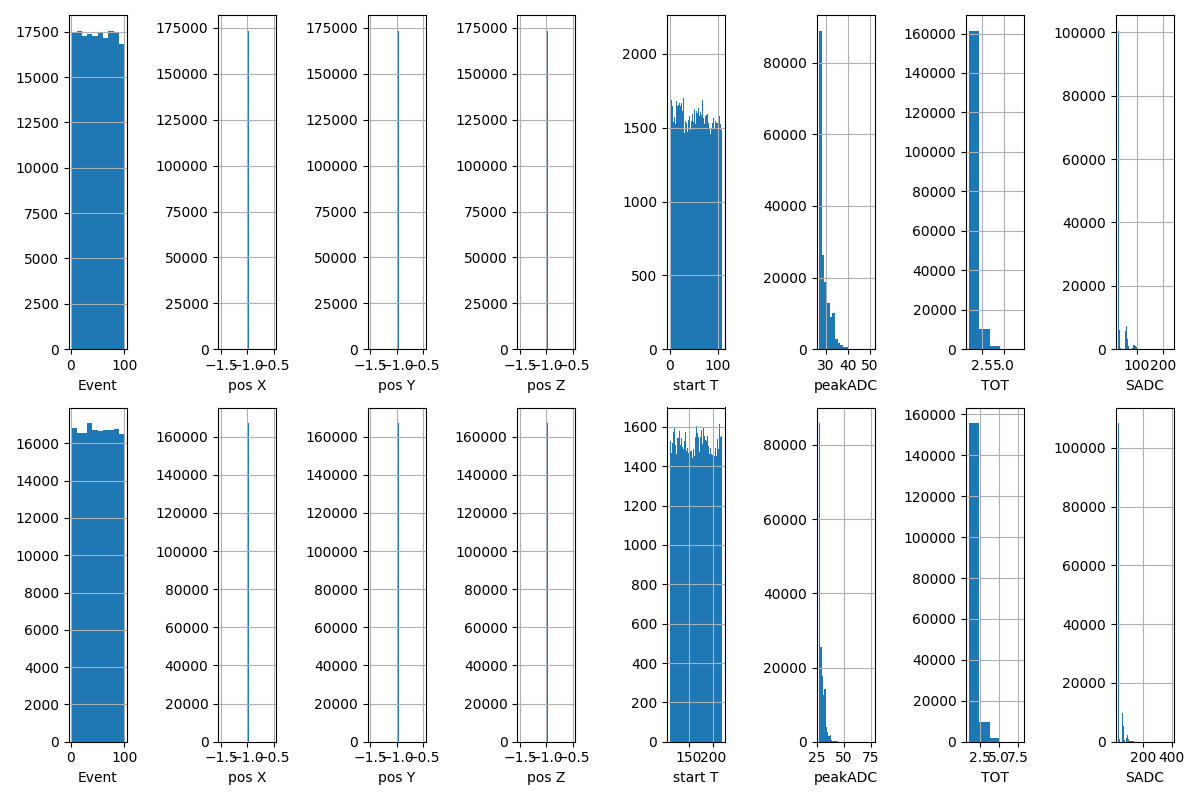

In [110]:
fig, axes = plt.subplots(2,8, figsize=(12,8))


dodgy_noise_p2 = all_tps.noise_p2[(all_tps.noise_p2.TP_startT < 110)]
ref_a_noise_p2 = all_tps.noise_p2[(all_tps.noise_p2.TP_startT >= 110) & (all_tps.noise_p2.TP_startT < 220)]
ref_b_noise_p2 = all_tps.noise_p2[(all_tps.noise_p2.TP_startT >= 220) & (all_tps.noise_p2.TP_startT < 330)]
ref_c_noise_p2 = all_tps.noise_p2[(all_tps.noise_p2.TP_startT >= 330) & (all_tps.noise_p2.TP_startT < 440)]

print(len(dodgy_noise_p2))
print(len(ref_a_noise_p2))
print(len(ref_b_noise_p2))
print(len(ref_c_noise_p2))

df = dodgy_noise_p2
ax=axes[0][0]
df.event.hist(ax=ax)
ax.set_xlabel('Event')
ax=axes[0][1]
df.TP_trueX.hist(ax=ax, bins=30)
ax.set_xlabel('pos X')
ax=axes[0][2]
df.TP_trueY.hist(ax=ax, bins=30)
ax.set_xlabel('pos Y')
ax=axes[0][3]
df.TP_trueZ.hist(ax=ax, bins=30)
ax.set_xlabel('pos Z')
ax=axes[0][4]
df.TP_startT.hist(ax=ax, bins=110)
ax.set_xlabel('start T')
ax=axes[0][5]
df.TP_peakADC.hist(ax=ax, bins=20)
ax.set_xlabel('peakADC')
ax=axes[0][6]
df.TP_TOT.hist(ax=ax, bins=5)
ax.set_xlabel('TOT')
ax=axes[0][7]
df.TP_SADC.hist(ax=ax, bins=100)
ax.set_xlabel('SADC')

df = ref_a_noise_p2
ax=axes[1][0]
df.event.hist(ax=ax)
ax.set_xlabel('Event')
ax=axes[1][1]
df.TP_trueX.hist(ax=ax, bins=30)
ax.set_xlabel('pos X')
ax=axes[1][2]
df.TP_trueY.hist(ax=ax, bins=30)
ax.set_xlabel('pos Y')
ax=axes[1][3]
df.TP_trueZ.hist(ax=ax, bins=30)
ax.set_xlabel('pos Z')
ax=axes[1][4]
df.TP_startT.hist(ax=ax, bins=110)
ax.set_xlabel('start T')
ax=axes[1][5]
df.TP_peakADC.hist(ax=ax, bins=40)
ax.set_xlabel('peakADC')
ax=axes[1][6]
df.TP_TOT.hist(ax=ax, bins=5)
ax.set_xlabel('TOT')
ax=axes[1][7]
df.TP_SADC.hist(ax=ax, bins=100)
ax.set_xlabel('SADC')

fig.tight_layout()

fig.tight_layout()